In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString
from shapely.geometry import Point
import random

In [2]:
travel_chain=pd.read_csv('../data/travelChain_test.csv')

In [3]:
unique_whos = travel_chain['who'].unique()
# random_who = random.choice(unique_whos)
random_who = 58904710
one_df = travel_chain[travel_chain['who'] == random_who]
df = one_df.dropna()
print(df)

             who      date  seiqd  mode  poi_o  poi_d    lambda_o      phi_o  \
172127  58904710  20190412      1     1      0      1  113.931391  22.684282   
172128  58904710  20190412      2     1      1      1  113.796795  22.768227   
172129  58904710  20190412      3     1      1      0  113.796795  22.768227   
172130  58904710  20190413      1     1      0     17  113.931391  22.684282   
172131  58904710  20190413      2     1     17      8  113.882438  22.747147   
...          ...       ...    ...   ...    ...    ...         ...        ...   
172500  58904710  20190720      6     1      3      5  113.888541  22.773644   
172501  58904710  20190721      1     1      1      2  113.871027  22.760306   
172502  58904710  20190721      2     1      2      3  113.891510  22.778782   
172503  58904710  20190721      3     1      3      8  113.888541  22.773644   
172504  58904710  20190721      4     1      8      0  113.901907  22.763959   

          lambda_d      phi_d     migrt

# 获得每一行对应的格网id

In [4]:
df['geometry_o'] = [Point(xy) for xy in zip(df['lambda_o'], df['phi_o'])]
df['geometry_d'] = [Point(xy) for xy in zip(df['lambda_d'], df['phi_d'])]
grid_gdf = gpd.read_file("../data/shenzhen_grid/shenzhen_grid.shp")

geo_df_o = gpd.GeoDataFrame(df, geometry='geometry_o')
result_o = gpd.sjoin(geo_df_o, grid_gdf, how="left", op="within")

geo_df_d = gpd.GeoDataFrame(df, geometry='geometry_d')
result_d = gpd.sjoin(geo_df_d, grid_gdf, how="left", op="within")

d:\Anaconda\envs\django\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
d:\Anaconda\envs\django\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
d:\Anaconda\envs\django\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [5]:
df['grid_id_o'] = result_o['fnid']  # 请使用实际的列名
df['grid_id_d'] = result_d['fnid']  # 同样使用实际的列名
df

d:\Anaconda\envs\django\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
d:\Anaconda\envs\django\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,who,date,seiqd,mode,poi_o,poi_d,lambda_o,phi_o,lambda_d,phi_d,migrt,geometry_o,geometry_d,grid_id_o,grid_id_d
172127,58904710,20190412,1,1,0,1,113.931391,22.684282,113.796795,22.768227,20190601,POINT (113.93139 22.68428),POINT (113.79679 22.76823),37916.0,51427.0
172128,58904710,20190412,2,1,1,1,113.796795,22.768227,113.796795,22.768227,20190601,POINT (113.79679 22.76823),POINT (113.79679 22.76823),51427.0,51427.0
172129,58904710,20190412,3,1,1,0,113.796795,22.768227,113.931391,22.684282,20190601,POINT (113.79679 22.76823),POINT (113.93139 22.68428),51427.0,37916.0
172130,58904710,20190413,1,1,0,17,113.931391,22.684282,113.882438,22.747147,20190601,POINT (113.93139 22.68428),POINT (113.88244 22.74715),37916.0,48249.0
172131,58904710,20190413,2,1,17,8,113.882438,22.747147,113.868544,22.756124,20190601,POINT (113.88244 22.74715),POINT (113.86854 22.75612),48249.0,49671.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172500,58904710,20190720,6,1,3,5,113.888541,22.773644,113.894227,22.756356,20190601,POINT (113.88854 22.77364),POINT (113.89423 22.75636),52536.0,49682.0
172501,58904710,20190721,1,1,1,2,113.871027,22.760306,113.891510,22.778782,20190601,POINT (113.87103 22.76031),POINT (113.89151 22.77878),50386.0,53251.0
172502,58904710,20190721,2,1,2,3,113.891510,22.778782,113.888541,22.773644,20190601,POINT (113.89151 22.77878),POINT (113.88854 22.77364),53251.0,52536.0
172503,58904710,20190721,3,1,3,8,113.888541,22.773644,113.901907,22.763959,20190601,POINT (113.88854 22.77364),POINT (113.90191 22.76396),52536.0,50756.0


In [6]:
one_df=df.dropna()
one_df.to_csv('../data/one_travel_chain.csv')

In [22]:
# 根据'date'在'migrt'之前的行划分为一个DataFrame
df_before_migrt = one_df[one_df['date'] < one_df['migrt']]
df_after_migrt = one_df[one_df['date']>one_df['migrt']]

print("DataFrame with 'date' before 'migrt':")
print(len(df_before_migrt))
print("DataFrame with 'date' after 'migrt':")
print(len(df_after_migrt))

DataFrame with 'date' before 'migrt':
93
DataFrame with 'date' after 'migrt':
235


d:\Anaconda\envs\django\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
d:\Anaconda\envs\django\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
d:\Anaconda\envs\django\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
d:\Anaconda\envs\django\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in S

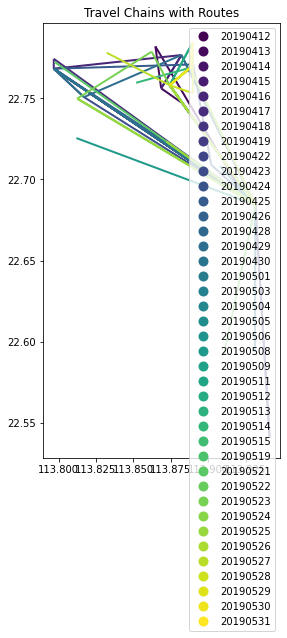

In [24]:
# 读取出行链数据
travel_chain = df_before_migrt

# 创建一个空的GeoDataFrame来存储出行链
gdf_travel_chain = gpd.GeoDataFrame(columns=['who', 'date', 'seiqd', 'mode', 'poi_o', 'poi_d', 'lambda_o', 'phi_o', 'lambda_d', 'phi_d', 'migrt', 'geometry'])
idx=0
for date, group in travel_chain.groupby('date'):
    idx =idx+1

    for index, row in group.iterrows():
        # 提取起点和终点坐标
        start_point = (row['lambda_o'], row['phi_o'])
        end_point = (row['lambda_d'], row['phi_d'])

        # 创建出行链线路
        line = LineString([start_point, end_point])

        # 将线路添加到GeoDataFrame
        gdf_travel_chain = gdf_travel_chain.append({
            'who': row['who'],
            'date': row['date'],
            'seiqd': row['seiqd'],
            'mode': row['mode'],
            'poi_o': row['poi_o'],
            'poi_d': row['poi_d'],
            'lambda_o': row['lambda_o'],
            'phi_o': row['phi_o'],
            'lambda_d': row['lambda_d'],
            'phi_d': row['phi_d'],
            'migrt': row['migrt'],
            'geometry': line,
            'idx': idx  # 将索引列添加到GeoDataFrame
        }, ignore_index=True)

gdf_travel_chain.crs = "EPSG:4326"
gdf_travel_chain.to_file('../data/shp/before_migrt.shp')

fig, ax = plt.subplots(figsize=(12, 8))

gdf_travel_chain.plot(ax=ax, column='date', cmap='viridis', linewidth=2, legend=True)

plt.title('Travel Chains with Routes')

plt.show()

d:\Anaconda\envs\django\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
d:\Anaconda\envs\django\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
d:\Anaconda\envs\django\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
d:\Anaconda\envs\django\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in S

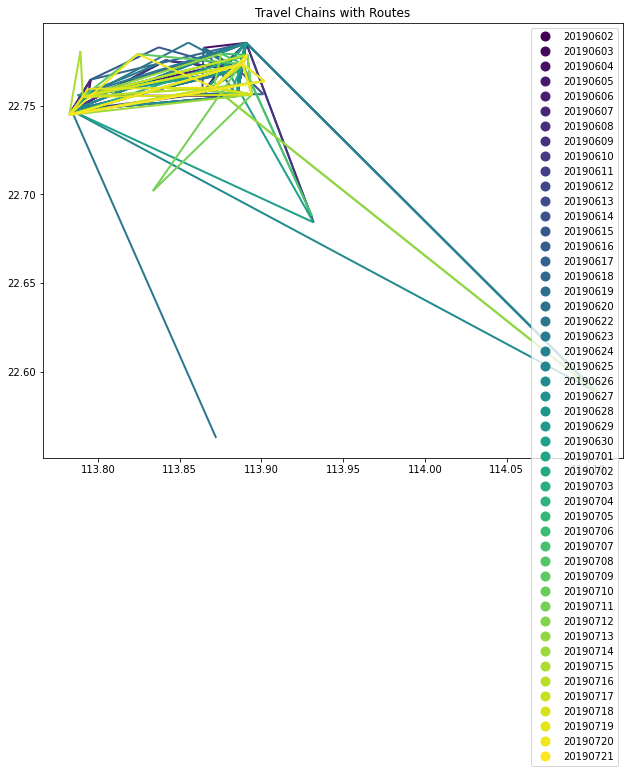

In [25]:
# 读取出行链数据
travel_chain = df_after_migrt

# 创建一个空的GeoDataFrame来存储出行链
gdf_travel_chain = gpd.GeoDataFrame(columns=['who', 'date', 'seiqd', 'mode', 'poi_o', 'poi_d', 'lambda_o', 'phi_o', 'lambda_d', 'phi_d', 'migrt', 'geometry'])
idx=0
for date, group in travel_chain.groupby('date'):
    idx=idx+1
    for index, row in group.iterrows():
        # 提取起点和终点坐标
        start_point = (row['lambda_o'], row['phi_o'])
        end_point = (row['lambda_d'], row['phi_d'])

        # 创建出行链线路
        line = LineString([start_point, end_point])

        # 将线路添加到GeoDataFrame
        gdf_travel_chain = gdf_travel_chain.append({
            'who': row['who'],
            'date': row['date'],
            'seiqd': row['seiqd'],
            'mode': row['mode'],
            'poi_o': row['poi_o'],
            'poi_d': row['poi_d'],
            'lambda_o': row['lambda_o'],
            'phi_o': row['phi_o'],
            'lambda_d': row['lambda_d'],
            'phi_d': row['phi_d'],
            'migrt': row['migrt'],
            'geometry': line,
            'idx': idx  # 将索引列添加到GeoDataFrame
        }, ignore_index=True)

gdf_travel_chain.crs = "EPSG:4326"
gdf_travel_chain.to_file('../data/shp/after_migrt.shp')

fig, ax = plt.subplots(figsize=(12, 8))

gdf_travel_chain.plot(ax=ax, column='date', cmap='viridis', linewidth=2, legend=True)

plt.title('Travel Chains with Routes')

plt.show()